# Ball Tracking
In this notebook you can see how we track the red ball in the video files. To get the coordinates of the red ball in the video files, we use the OpenCV library. This notebook is only for the visualization of the trajectories of the recordings. 

In [160]:
import cv2
import glob

import pandas as pd

Give the directory of the recordings and the pixel size of the recordings.

In [161]:
recording_dir = '../data-9-cams/Recordings_2024-03-19_15h25m/'
px_size = 128

In [162]:

mp4_files = glob.glob(recording_dir + '*.mp4')
cap = None
if not mp4_files:
    print('No mp4 files found')
else:
    first_file = mp4_files[0]
    cap = cv2.VideoCapture(first_file)

if not cap.isOpened():
    print("Error opening video stream or file")

else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
            break
            
cap.release()
cv2.destroyAllWindows()

#### Detect the red ball and show

In [163]:
import numpy as np

cap = cv2.VideoCapture(mp4_files[0])

detected_ball = None
last_frame = None
lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)


while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break
    # Create a mask to isolate the red color
    mask = cv2.inRange(frame, lower_red, upper_red)
    # Apply the mask to the frame to detect the red color
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    #   cv2.imshow('Current Frame', frame)
    cv2.imshow('Detected Ball', detected_ball)
    last_frame = frame
    if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
        break

cap.release()
cv2.destroyAllWindows()

In [164]:
import cv2
import numpy as np

cap = cv2.VideoCapture(mp4_files[0])

detected_ball = None
last_frame = None
lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)

frame_count = 0

while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break
    
    frame_count += 1
    
    # Save the first frame with detected ball
    if frame_count == 1:
        # save the frame
        cv2.imwrite('first_frame.png', frame)
        mask = cv2.inRange(frame, lower_red, upper_red)
        detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
        cv2.imwrite('first_frame_with_detected_ball.png', detected_ball)

    # Create a mask to isolate the red color
    mask = cv2.inRange(frame, lower_red, upper_red)
    # Apply the mask to the frame to detect the red color
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    #   cv2.imshow('Current Frame', frame)
    cv2.imshow('Detected Ball', detected_ball)
    last_frame = frame
    if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
        break

cap.release()
cv2.destroyAllWindows()


#### Show the amount of frames in the video

In [165]:
def video_to_frame(video_file):
    cap = cv2.VideoCapture(video_file)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f'Number of frames in the video: {length}')
    cap.release()
    cv2.destroyAllWindows()
    # get all the coordinates of the pixels that are between the lower and upper red


    red_coordinates_f = np.column_stack(
        np.where((last_frame[:, :, 0] >= lower_red[0]) & (last_frame[:, :, 0] <= upper_red[0]) &
                 (last_frame[:, :, 1] >= lower_red[1]) & (last_frame[:, :, 1] <= upper_red[1]) &
                 (last_frame[:, :, 2] >= lower_red[2]) & (last_frame[:, :, 2] <= upper_red[2])
                 ))
    # invert the y-axis so that the origin is at the bottom left
    red_coordinates_f[:, 0] = last_frame.shape[0] - red_coordinates_f[:, 0]
    from matplotlib import pyplot as plt
    
    plt.scatter(red_coordinates_f[:, 1], red_coordinates_f[:, 0], c='red', marker='.')
    plt.title('Red Ball Coordinates')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.xlim(0, px_size)
    plt.ylim(0, px_size)
    plt.grid(True)
    plt.show()

Number of frames in the video: 813


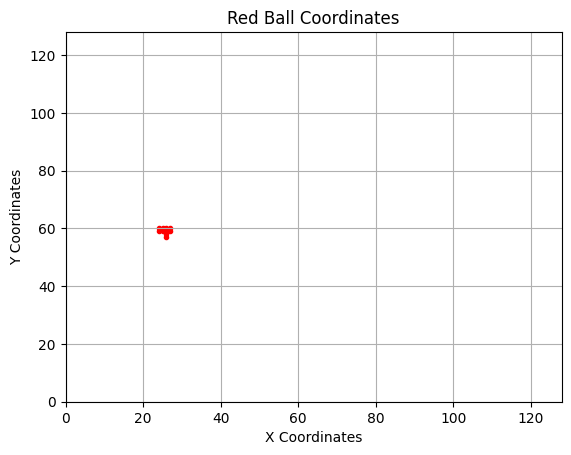

In [166]:
video_to_frame(mp4_files[0])

#### Get and Show the coordinates of the red ball in one frame

In [180]:
# get all the coordinates of the pixels that are between the lower and upper red
red_coordinates = np.column_stack(np.where((last_frame[:, :, 0] >= lower_red[0]) & (last_frame[:, :, 0] <= upper_red[0]) &
    (last_frame[:, :, 1] >= lower_red[1]) & (last_frame[:, :, 1] <= upper_red[1]) &
    (last_frame[:, :, 2] >= lower_red[2]) & (last_frame[:, :, 2] <= upper_red[2])
))
# invert the y-axis so that the origin is at the bottom left
red_coordinates[:, 0] = last_frame.shape[0] - red_coordinates[:, 0]

In [182]:
red_coordinates = pd.DataFrame(red_coordinates, columns=['X', 'Y'])
# give the datasets first column the name 'X-coordinaat' and the second column the name 'Y-coordinaat'
red_coordinates

,X,Y
0,60,24
1,60,25
2,60,26
3,60,27
4,59,24
5,59,25
6,59,26
7,59,27
8,58,26
9,57,26


In [169]:
# calculate the mean of the x and y coordinates
mean_x = np.median(red_coordinates[:, 1])
mean_y = np.median(red_coordinates[:, 0])
mean_x, mean_y

(26.0, 59.0)

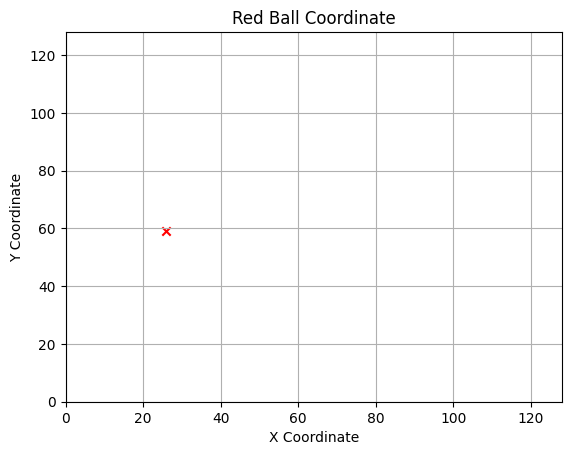

In [170]:
# show the coordinates of the red ball with mean_X and meay in a graph with a grid border is 128
from matplotlib import pyplot as plt

plt.scatter(mean_x, mean_y, c='red', marker='x')
plt.title('Red Ball Coordinate')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, px_size)
plt.ylim(0, px_size)
plt.grid(True)
plt.show()


#### Get the middle coordinate of the red ball in all frames

In [171]:
from utils.ball_tracker_calculations import calculate_middle_points_of_ball
from matplotlib import pyplot as plt

def from_video_to_coordinates_and_show(video_file, lower_red, upper_red):
    cap = cv2.VideoCapture(video_file)
    mean_x, mean_y = calculate_middle_points_of_ball(cap, lower_red, upper_red)
    plt.scatter(mean_x, mean_y, marker='o', linestyle='-', color='red')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory of Detected Red Ball')
    
    # Invert the y-axis if needed
    plt.xlim(0, px_size)
    plt.ylim(0, px_size)
    plt.grid(True)
    plt.show()

### Show the trajectory of the ball in all videos

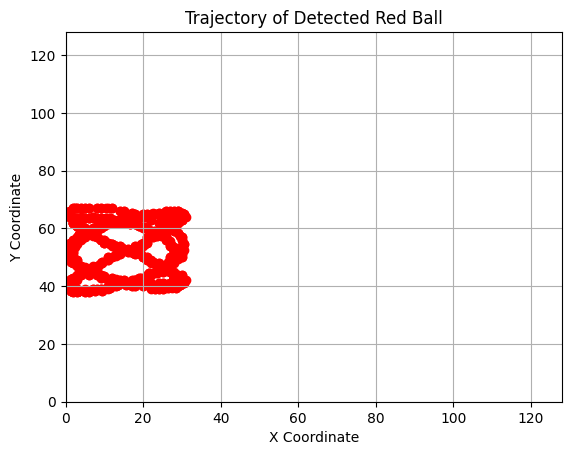

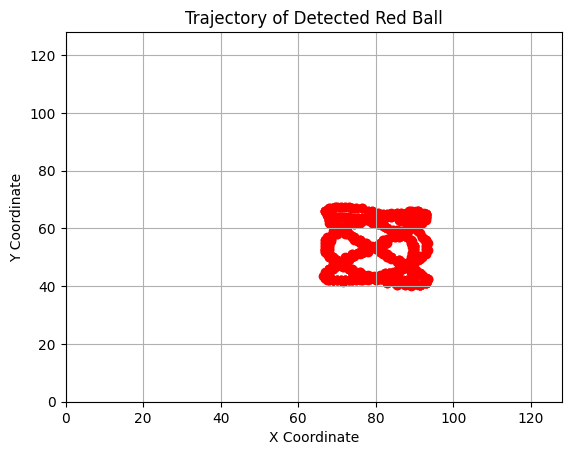

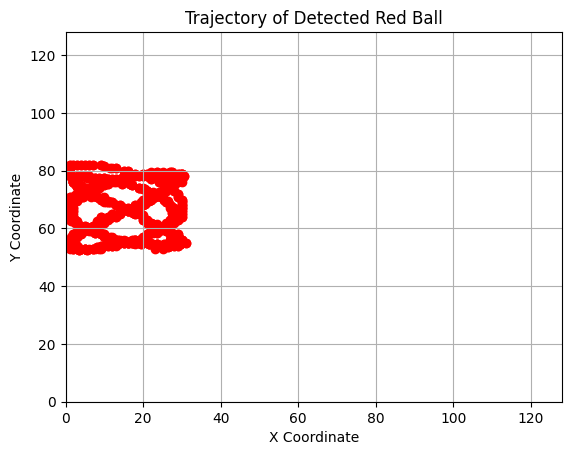

C:\Users\xande\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\xande\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


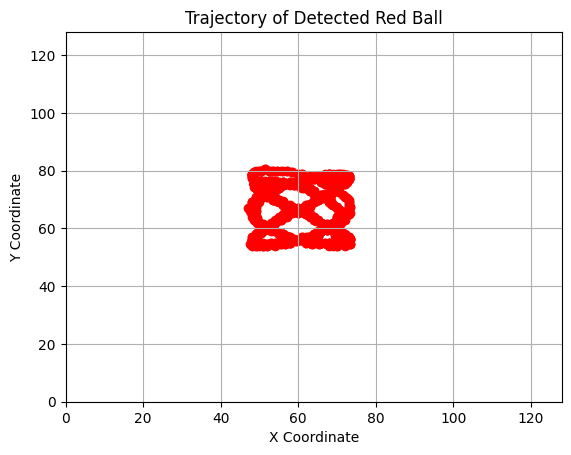

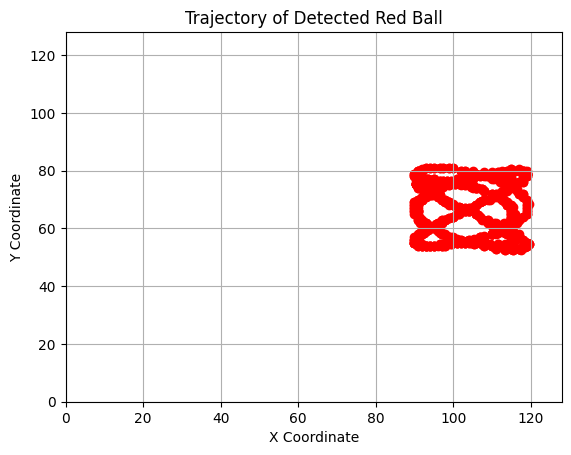

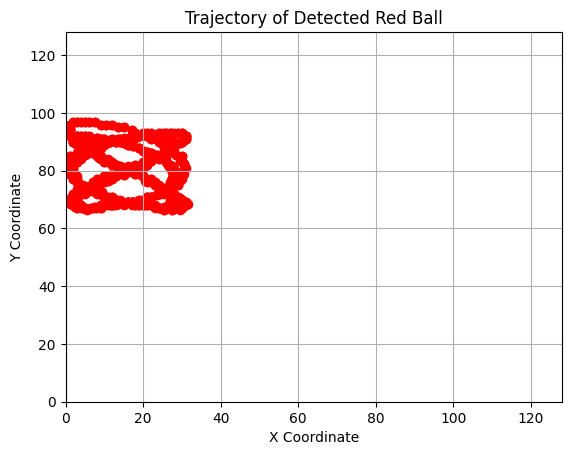

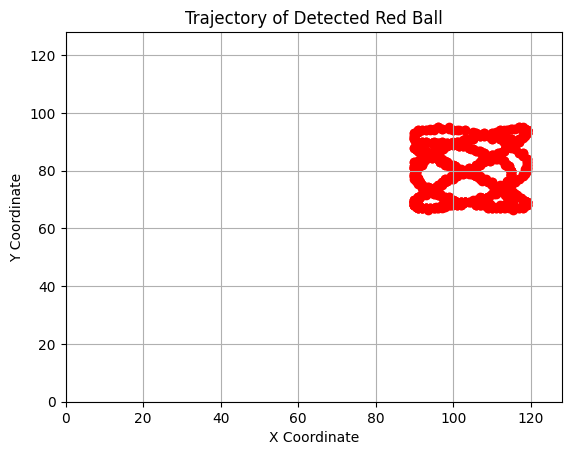

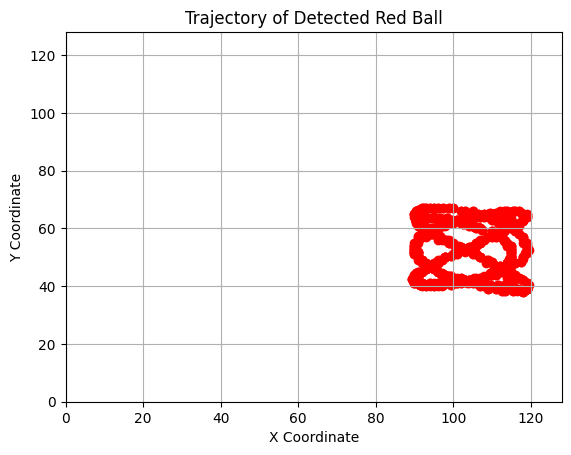

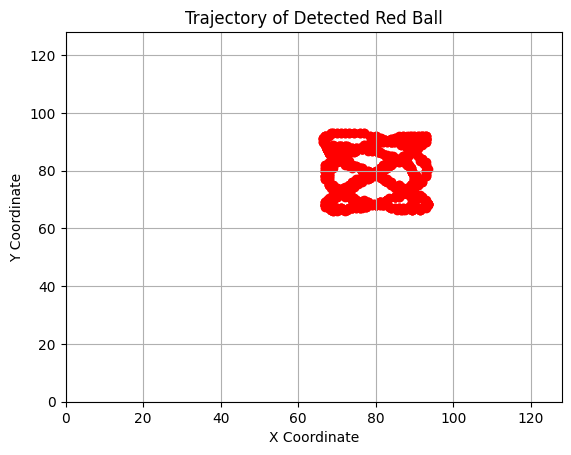

In [172]:

lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)

for i in range(len(mp4_files)):
    from_video_to_coordinates_and_show(mp4_files[i], lower_red, upper_red)


In [185]:
pos = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h25m.csv', delimiter=',', decimal='.')
pos

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,u7,v7,u8,v8
0,16.0,52.5,79.0,53.5,16.0,66.0,60.5,66.0,103.5,66.0,16.0,80.0,103.0,79.5,103.0,53.0,79.0,79.0
1,15.0,53.0,78.5,53.5,14.0,67.0,59.0,67.0,102.0,67.0,15.0,81.0,102.0,80.0,102.0,53.5,78.5,79.5
2,13.0,54.0,77.0,55.0,13.0,68.0,58.0,68.0,100.0,68.0,13.0,82.0,100.5,81.5,100.5,54.0,76.5,80.0
3,12.0,54.0,76.0,55.0,11.5,69.0,56.0,68.0,99.0,68.0,12.0,83.0,99.0,81.5,99.0,55.0,76.0,81.0
4,10.0,55.0,75.0,56.0,10.5,69.0,56.0,69.5,98.0,69.0,10.0,83.0,98.0,82.0,98.0,56.0,74.5,81.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,26.0,47.0,88.0,48.0,26.0,61.0,68.5,60.5,113.0,61.0,26.0,74.0,113.0,75.0,113.5,46.5,88.0,73.5
809,25.0,47.0,87.0,47.0,25.0,60.0,68.0,60.0,113.0,60.0,25.5,73.5,112.0,74.0,112.0,46.0,88.0,73.0
810,24.0,46.0,86.5,46.5,24.0,59.0,67.0,60.0,111.0,59.0,24.0,72.0,111.0,73.0,111.0,45.0,86.5,72.5
811,21.5,44.5,85.0,45.0,21.5,58.0,65.0,58.5,110.0,58.0,22.0,71.0,109.0,71.0,109.5,44.0,85.0,71.0
